<a href="https://colab.research.google.com/github/icygit6/image-processing/blob/main/final_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pencil Sketch

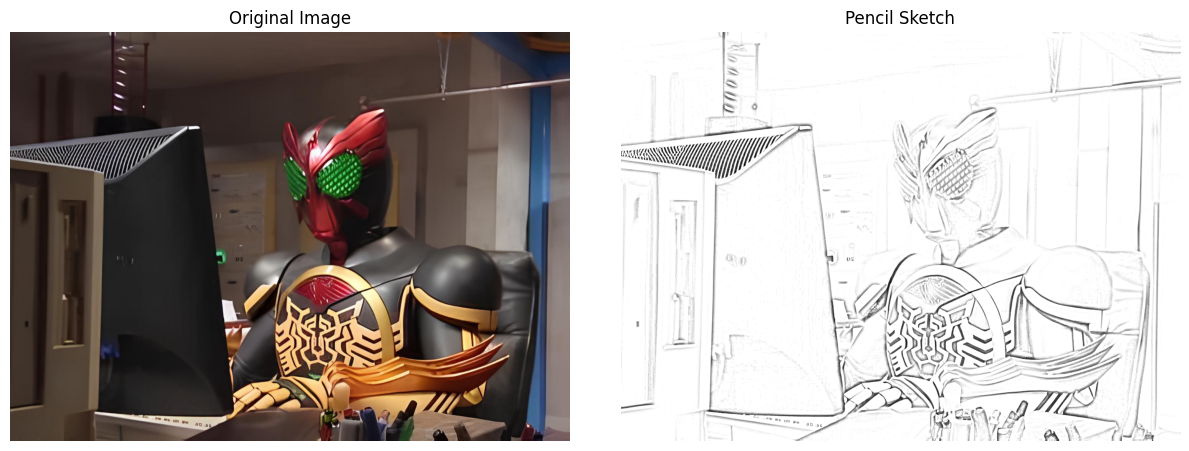

In [92]:
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/1000003665.jpg"
image = cv2.imread(path)
gimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
invert = 255 - gimg

blurred_image = cv2.GaussianBlur(invert, (21, 21), 0)

invertblur = 255 - blurred_image
pencil_sketch = cv2.divide(gimg, invertblur, scale=256.0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(pencil_sketch, cmap="gray")
plt.title("Pencil Sketch")
plt.tight_layout()
plt.axis("off")
plt.show()

# Cartoonize

(-0.5, 1351.5, 987.5, -0.5)

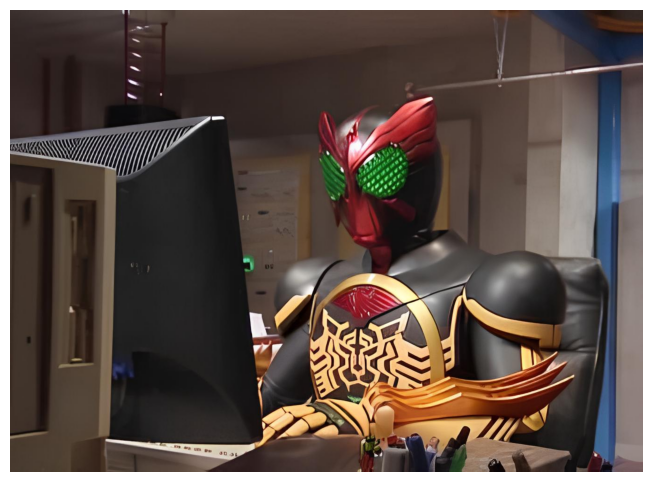

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6)
img = cv2.imread("/content/drive/MyDrive/python/IMAGE PROCESSING/1000003665.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")

(-0.5, 1351.5, 987.5, -0.5)

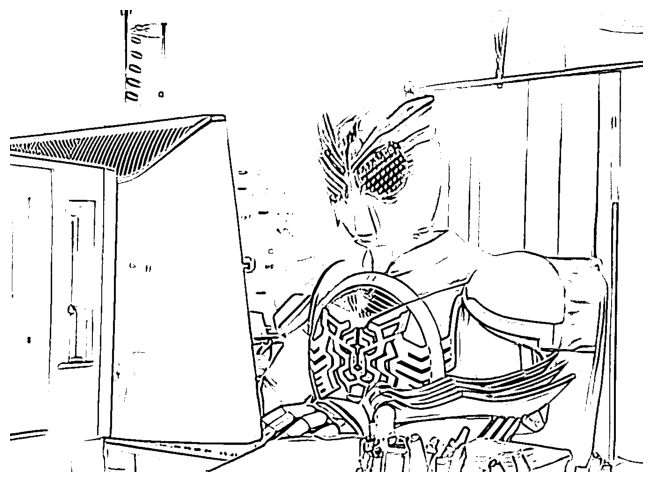

In [100]:
line_size = 9
blur_value = 5 # rnage 5 to 9
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.medianBlur(gray_img, blur_value)
edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
plt.imshow(edges, cmap="gray")
plt.axis("off")

(-0.5, 1351.5, 987.5, -0.5)

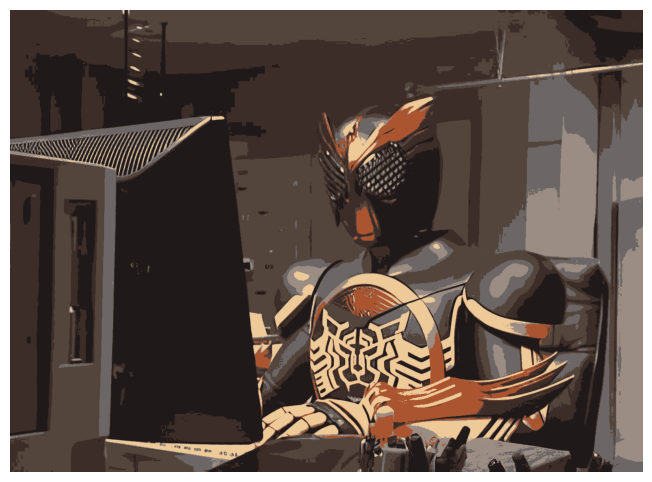

In [101]:
from sklearn.cluster import KMeans
k = 7 # you can set this scaling as you like how will it be resulted
data = img.reshape(-1, 3)
kmeans = KMeans(n_clusters=k, random_state=1028).fit(data) # you can just get the random state to tezturize the image
img_reduced = kmeans.cluster_centers_[kmeans.labels_]
img_reduced = img_reduced.reshape(img.shape)
img_reduced = img_reduced.astype(np.uint8)
plt.imshow(img_reduced)
plt.axis("off")

(-0.5, 1351.5, 987.5, -0.5)

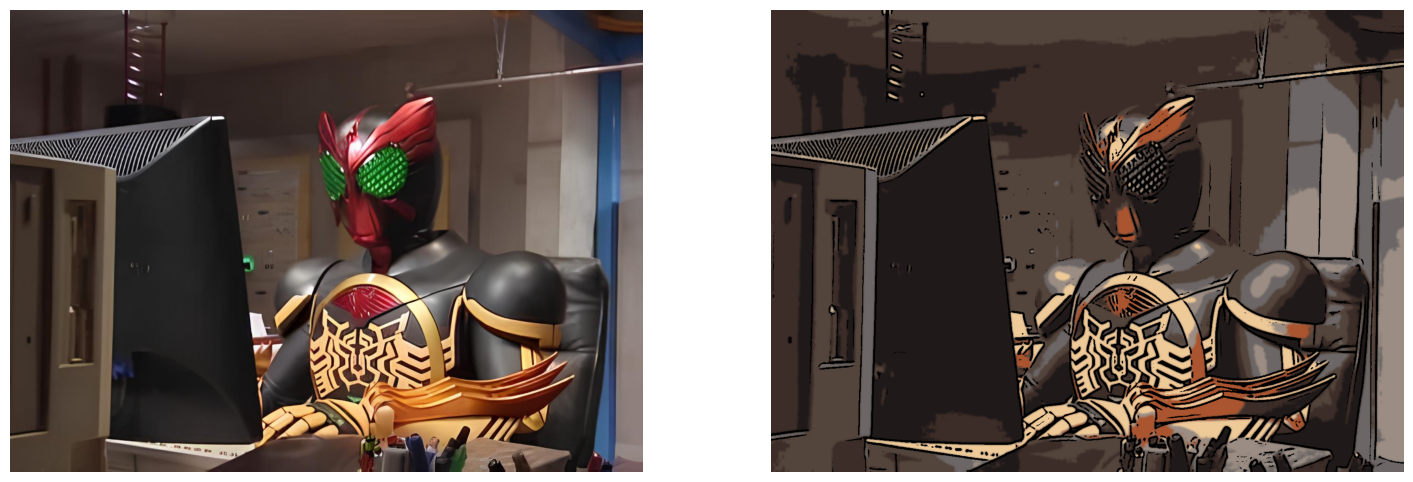

In [102]:
blurred = cv2.bilateralFilter(img_reduced, d=6, sigmaColor=1028,sigmaSpace=1028)
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cartoon)
plt.axis("off")

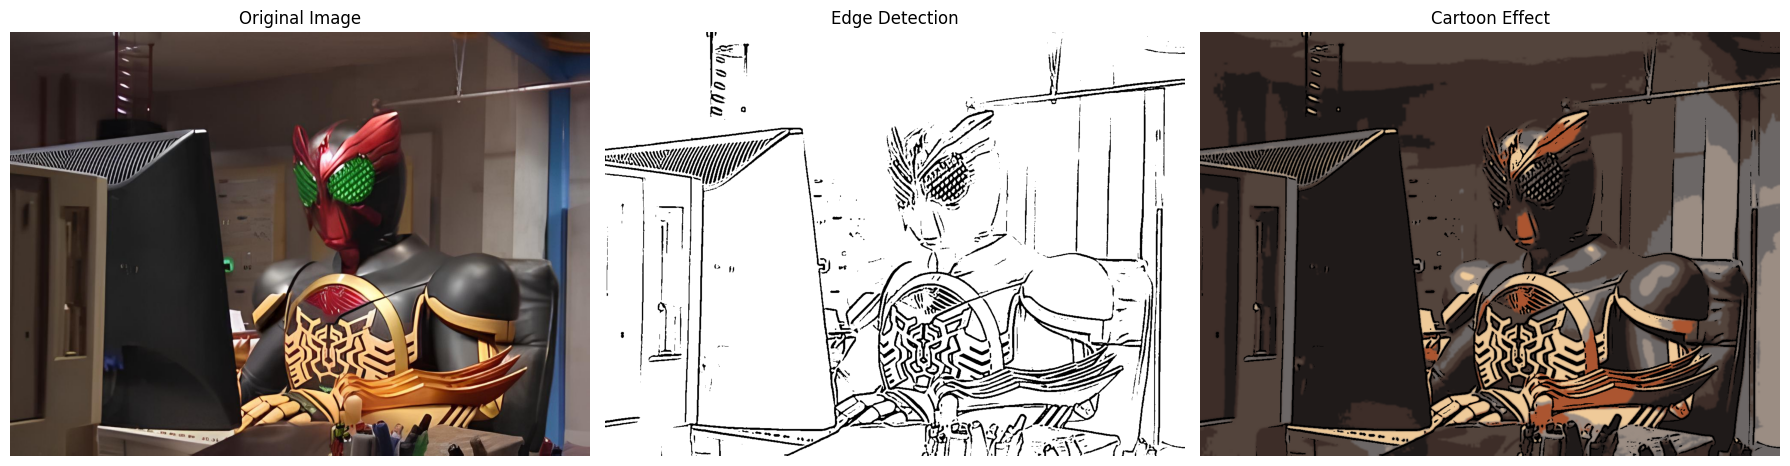

In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 6)
img = cv2.imread("/content/drive/MyDrive/python/IMAGE PROCESSING/1000003665.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale and apply a median blur
line_size = 9
blur = 5
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.medianBlur(gray_img, blur)

# Apply adaptive thresholding to get edges
edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur)

# KMeans clustering to reduce colors
k = 7
data = img.reshape(-1, 3)
kmeans = KMeans(n_clusters=k, random_state=1028).fit(data)
img_reduced = kmeans.cluster_centers_[kmeans.labels_]
img_reduced = img_reduced.reshape(img.shape)
img_reduced = img_reduced.astype(np.uint8)
blurred = cv2.bilateralFilter(img_reduced, d=6, sigmaColor=1028, sigmaSpace=1028)
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cartoon)
plt.title("Cartoon Effect")
plt.axis("off")

plt.tight_layout()
plt.show()
